<a href="https://colab.research.google.com/github/agibayrashitnu/Deep-Learning/blob/main/RNN_LSTM_for_IMDB_Review_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 20000)

17464789/17464789 [==============================] - 0s 0us/step


In [9]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [10]:
# apply padding
x_train = pad_sequences(x_train, maxlen = 100)
x_test = pad_sequences(x_test, maxlen = 100)

In [11]:
x_train.shape, x_test.shape

((25000, 100), (25000, 100))

# Building the model

In [12]:
#Define an object As RNN
model = tf.keras.models.Sequential()

In [13]:
#Embedding layer
model.add(tf.keras.layers.Embedding(input_dim = 20000, output_dim = 128, input_shape= (100,)))

In [14]:
#LSTM layer
model.add(tf.keras.layers.LSTM(units = 128, activation = 'tanh'))

In [15]:
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2691713 (10.27 MB)
Trainable params: 2691713 (10.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Compile the model
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the model

In [18]:
history = model.fit(x_train, y_train, batch_size = 128, epochs = 5, validation_data = (x_test, y_test))

Epoch 1/5
196/196 [==============================] - 126s 625ms/step - loss: 0.5399 - accuracy: 0.7147 - val_loss: 0.3966 - val_accuracy: 0.8294
Epoch 2/5
196/196 [==============================] - 119s 611ms/step - loss: 0.3412 - accuracy: 0.8573 - val_loss: 0.4221 - val_accuracy: 0.8041
Epoch 3/5
196/196 [==============================] - 119s 609ms/step - loss: 0.2837 - accuracy: 0.8847 - val_loss: 0.3677 - val_accuracy: 0.8398
Epoch 4/5
196/196 [==============================] - 103s 525ms/step - loss: 0.2416 - accuracy: 0.9072 - val_loss: 0.4858 - val_accuracy: 0.8296
Epoch 5/5
196/196 [==============================] - 118s 601ms/step - loss: 0.2121 - accuracy: 0.9195 - val_loss: 0.4309 - val_accuracy: 0.8384


In [19]:
y_pred = model.predict(x_test).round()

782/782 [==============================] - 51s 64ms/step


In [20]:
print(y_pred)

[[0.]
 [1.]
 [1.]
 ...
 [0.]
 [1.]
 [1.]]


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 9654  2846]
 [ 1194 11306]]


In [22]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.8384


In [23]:
  def learning_curve(history, epochs):

    epoch_range = range(1,epochs + 1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title("Model Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy Score')
    plt.legend(['accuracy', 'val_acc'], loc = 'lower right')
    plt.show()

    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title("Model Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['loss', 'val_loss'], loc = 'upper right')
    plt.show()

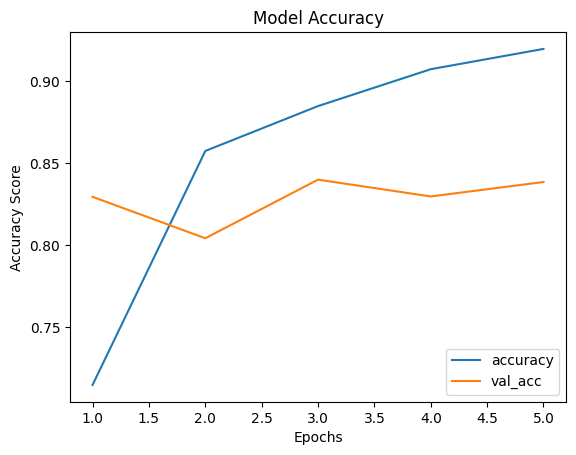

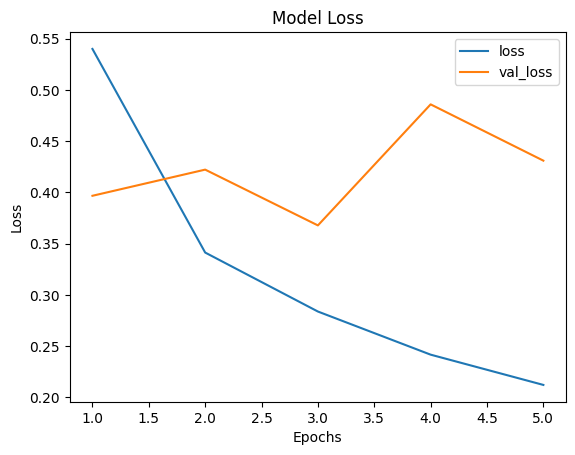

In [24]:
learning_curve(history,5)

In [ ]:
# Model is slightly overfitting , but overall results are good for the first trail